#                                        ALGERIAN FOREST FIRE DATASET ANALYSIS

## Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading the data
df=pd.read_csv('D:\\1.SOMALI MISHRA\\1.iNeuron\\Machine Learning\\dataset\\Algerian_forest_fires_dataset_UPDATE.csv')

In [3]:
#checking 1st 5 records
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
#checking the shape of the data
df.shape

(247, 14)

In [5]:
#to display whole record
# pd.set_option('display.width', 5000)
# pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

                               day  month  year  Temperature   RH   Ws  Rain   \
0                                1      6  2012           29   57   18      0   
1                                2      6  2012           29   61   13    1.3   
2                                3      6  2012           26   82   22   13.1   
3                                4      6  2012           25   89   13    2.5   
4                                5      6  2012           27   77   16      0   
5                                6      6  2012           31   67   14      0   
6                                7      6  2012           33   54   13      0   
7                                8      6  2012           30   73   15      0   
8                                9      6  2012           25   88   13    0.2   
9                               10      6  2012           28   79   12      0   
10                              11      6  2012           31   65   14      0   
11                          

In [6]:
#Found 122,123 and 124 contains NaN value, sowe need to delete those records 
df.iloc[122:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [7]:
#Deleting records 122,123,124 indexed data
df.drop(index=[122,123,124],inplace=True)
#resetting the index
df.reset_index(inplace=True)

In [8]:
#it has created index column so we need to delete that column
df.iloc[0:]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [9]:
#Deleting index column as we dont required the column
df.drop('index',axis=1,inplace=True)

In [10]:
#Now check the records of the dataset df
df.shape
#earlier it was (247, 14)

(244, 14)

In [11]:
#Now create Region column for Bejaia and Sidi Bel-abbes region as it is mentioned in the dataset
df.loc[:122,'Region']='Bejaia'
df.loc[122:, 'Region']='Sidi Bel-abbes'

In [12]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia


In [13]:
# Here it is visible that some columns have spaces in the names like 

In [14]:
#removing spaces from column names like RH, Ws, Classes,Rain etc.
df.columns= [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
#checking null values and datatypes of columns
#For Classes column there is 243 records out of 244 so null value is there we need to handle null values
#Datatypes of all the columns are object type, we also have to change the data type by checking each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


# Check Unique Records of Column

In [16]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [17]:
df['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [18]:
df['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [19]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [20]:
#Here we can see 'fire ' is there in between all numerical values
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',

In [21]:
# replacing 'fire   ' value witha 'nan' value
#we can not apply mean now as the datatype has not been changed yet (df['FWI']. fillna(value=df['FWI']. mean(), inplace=True))
df.loc[165,'FWI']='nan'

In [22]:
#now the value has been repalced with 'nan'
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'nan', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
   

In [23]:
df['DMC'].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6',
       '12.9', '18', '19.4', '21.1', '23.9', '27.8', '32.7', '39.

In [24]:
#Here there is a space in 14.6 9
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [25]:
# replacing 14.6 9 value with 14.69
df.loc[165,'DC']='14.69'

In [26]:
df['ISI'].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [27]:
#In classes column 'fire' and 'not fire' has been written in different ways
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [28]:
#Removed the extra spaces from values 
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# Converting data types of columns

In [29]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int32(6), object(2)
memory usage: 23.0+ KB


In [31]:
#checking the null values of column
#In FWI and Classes Null vaues are there
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

In [32]:
#replacing the null values with mean
df['FWI']. fillna(value=df['FWI']. mean(), inplace=True)

In [33]:
#replacing the null values with mode as it is categorical column
df['Classes']=df['Classes']. fillna(df['Classes']. mode()[0])

In [34]:
df.iloc[0:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.60,1.3,3.4,0.500000,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.60,1.0,3.9,0.400000,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.10,0.3,2.7,0.100000,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.90,0.0,1.7,0.000000,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.20,1.2,3.9,0.500000,not fire,Bejaia
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.20,3.1,7.0,2.500000,fire,Bejaia
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.50,6.4,10.9,7.200000,fire,Bejaia
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.30,5.6,13.5,7.100000,fire,Bejaia
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.80,0.4,10.5,0.300000,not fire,Bejaia
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.30,1.3,12.6,0.900000,not fire,Bejaia


In [35]:
#creating Date column using 'day','month' and 'year'
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(3), object(2)
memory usage: 22.0+ KB


In [37]:
df.shape

(244, 13)

In [38]:
#In Classes column convert fire and not fire to 0 and 1 respectively
df['Classes']=df['Classes'].str.replace('not fire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

In [39]:
#check unique records
df['Classes'].unique()

array(['0', '1'], dtype=object)

In [40]:
#check unique records
df['Region'].unique()

array(['Bejaia', 'Sidi Bel-abbes'], dtype=object)

In [41]:
#In Classes column convert fire and not fire to 0 and 1 respectively
df['Region']=df['Region'].str.replace('Bejaia','0')
df['Region']=df['Region'].str.replace('Sidi Bel-abbes','1')

In [42]:
#check unique records
df['Region'].unique()

array(['0', '1'], dtype=object)

# Statical Analysis

In [43]:
#Checking statistical information about all columns
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Temperature,244.0,NaN,NaN,NaN,NaT,NaT,32.172131,3.633843,22.0,30.0,32.0,35.0,42.0
RH,244.0,NaN,NaN,NaN,NaT,NaT,61.938525,14.8842,21.0,52.0,63.0,73.25,90.0
Ws,244.0,NaN,NaN,NaN,NaT,NaT,15.504098,2.810178,6.0,14.0,15.0,17.0,29.0
Rain,244.0,NaN,NaN,NaN,NaT,NaT,0.760656,1.999406,0.0,0.0,0.0,0.5,16.8
FFMC,244.0,NaN,NaN,NaN,NaT,NaT,77.887705,14.337571,28.6,72.075,83.5,88.3,96.0
DMC,244.0,NaN,NaN,NaN,NaT,NaT,14.673361,12.368039,0.7,5.8,11.3,20.75,65.9
DC,244.0,NaN,NaN,NaN,NaT,NaT,49.288484,47.619393,6.9,13.275,33.1,68.15,220.4
ISI,244.0,NaN,NaN,NaN,NaT,NaT,4.77418,4.175318,0.0,1.4,3.5,7.3,19.0
BUI,244.0,NaN,NaN,NaN,NaT,NaT,16.664754,14.204824,1.1,6.0,12.25,22.525,68.0
FWI,244.0,NaN,NaN,NaN,NaT,NaT,7.035391,7.425242,0.0,0.7,4.45,11.375,31.1


In [44]:
#check the duplicate records
#There is no duplicate records are there
df[df.duplicated()]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date


In [45]:
#segregating the category and numerical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [46]:
#print numeric_features
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'date']

In [47]:
#print categorical_features
categorical_features

['Classes', 'Region']

# Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

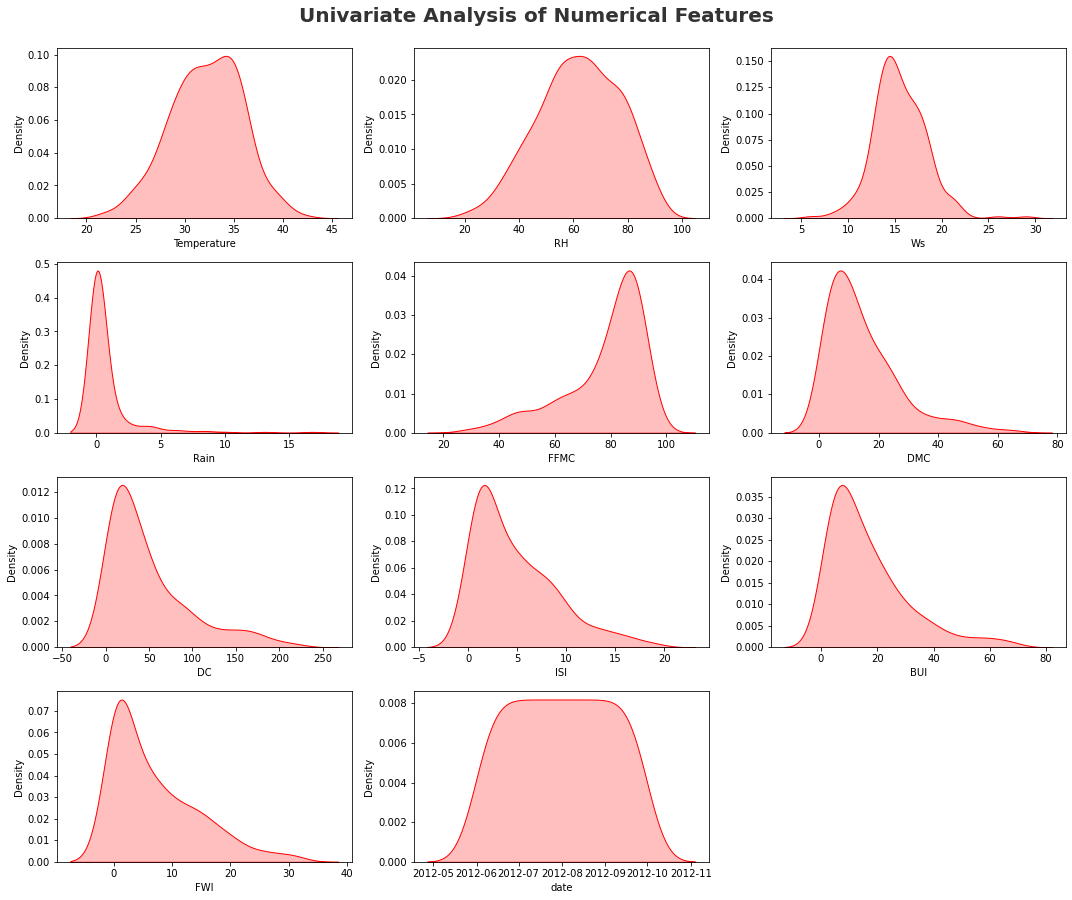

In [48]:
#another way distribution of all the numeric variable
#Univariate Analysis of Numerical Features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Observations:
    Rain,DC,FWI,ISI,BUI and DMC are Right skewed.
    FFMC is Left Skewed.
    There is outlier in Rain,DC,FWI,ISI,BUI and DMC
    RH,Temp and Ws is following almost equal to gaussian distribution.

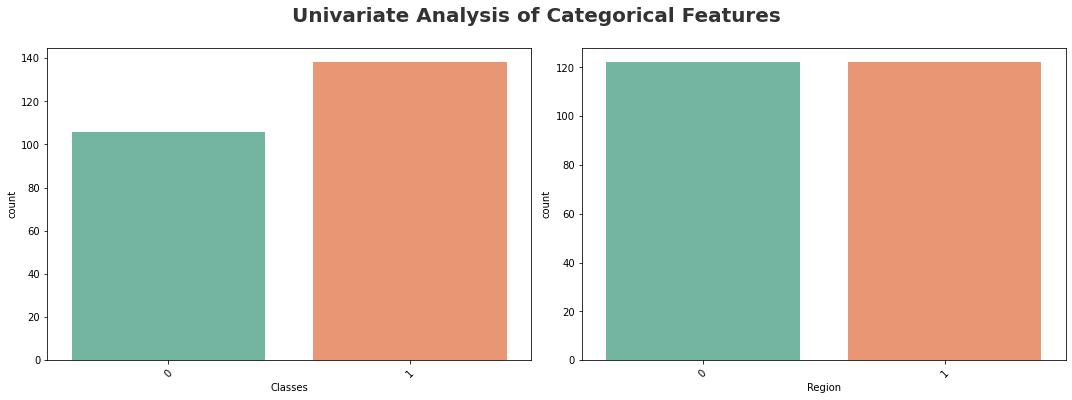

In [49]:
# categorical columns count plot analysis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Classes', 'Region']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.

In [50]:
#Check Multicollinearity in Numerical features

In [51]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564599
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577577
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032315
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324369
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690289
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875827
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738714
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916343
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857628
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738714,0.916343,0.857628,1.000000


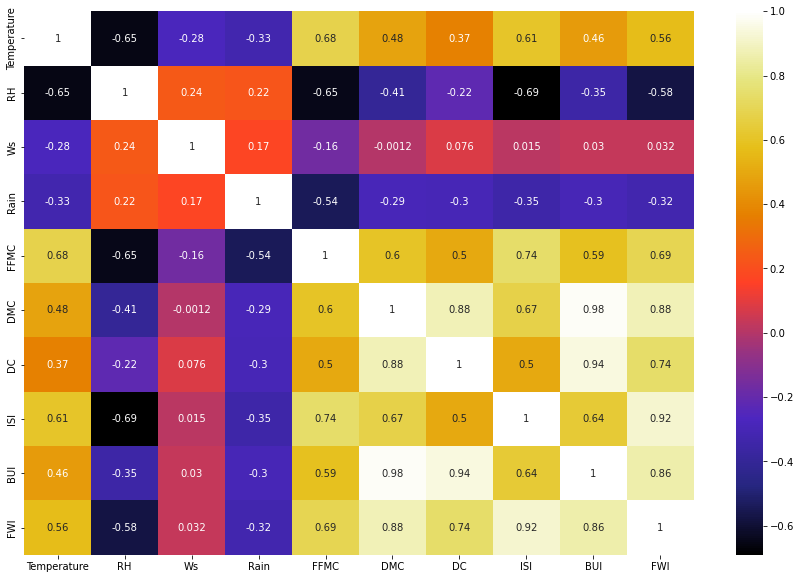

In [52]:
#plotting heat map
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

# Observations:
    --->Highly +ve corelated features are FWI and ISI,BUI and DC,BUI and DMC
    --->Highly -ve corelated features are FFMC and RH,ISI and RH,RH and Temperature
    

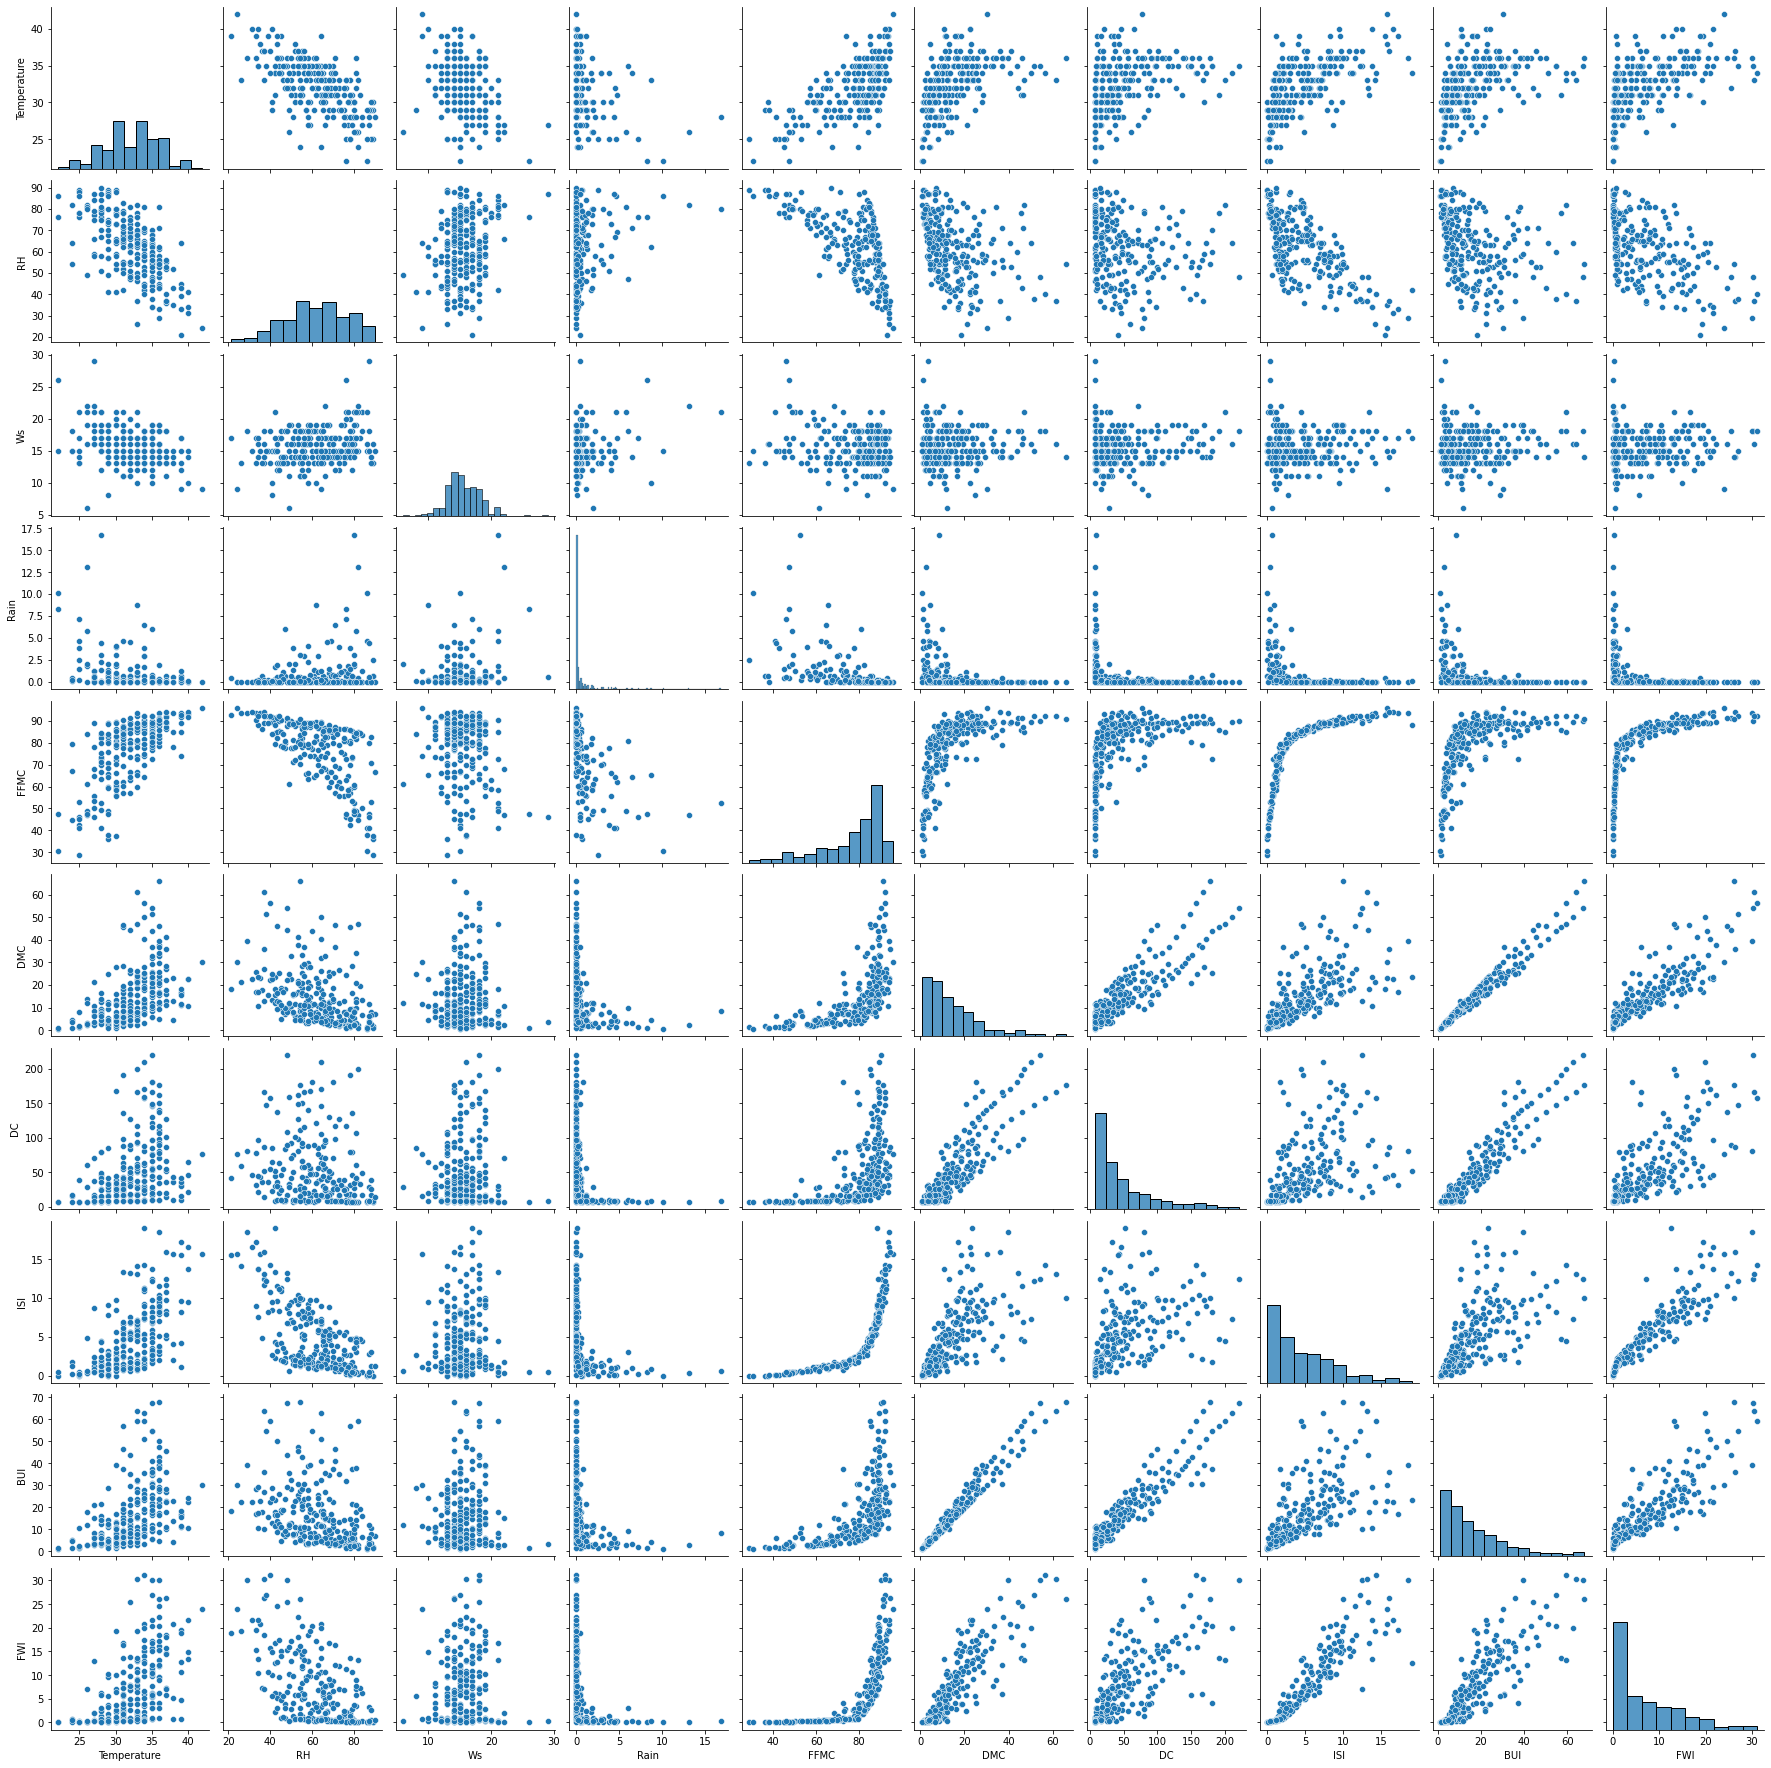

In [53]:
#checking corelation in visualize way for all feature
sns.pairplot(df)

# Checking for outliers

<AxesSubplot:>

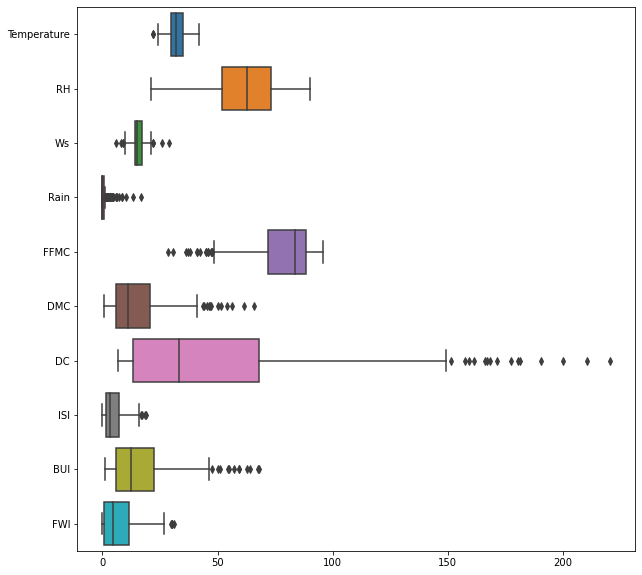

In [54]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,orient='h')

# Graph Analysis

## Different variable Relation with Target Feature

Text(0, 0.5, 'Temperature')

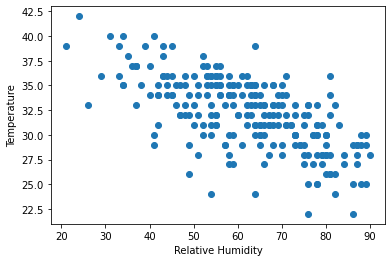

In [55]:
plt.scatter(df['RH'],df['Temperature'])
plt.xlabel('Relative Humidity')
plt.ylabel('Temperature')

Observation:
With increase in Relative Humidity Temp is deccreases.
So, RH and Temp are Inversely Proportional

Text(0, 0.5, 'Temperature')

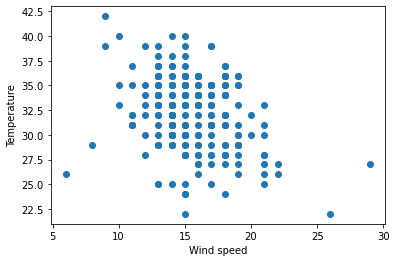

In [56]:
plt.scatter(df['Ws'],df['Temperature'])
plt.xlabel('Wind speed')
plt.ylabel('Temperature')

Observation: With increase in wind speed Temp is deccreases

Text(0, 0.5, 'Temperature')

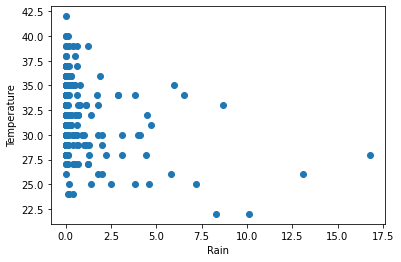

In [57]:
plt.scatter(df['Rain'],df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

Observations: Due to high temperature there is no rain

## How the Temperature is varying through out the year

<AxesSubplot:xlabel='date', ylabel='Temperature'>

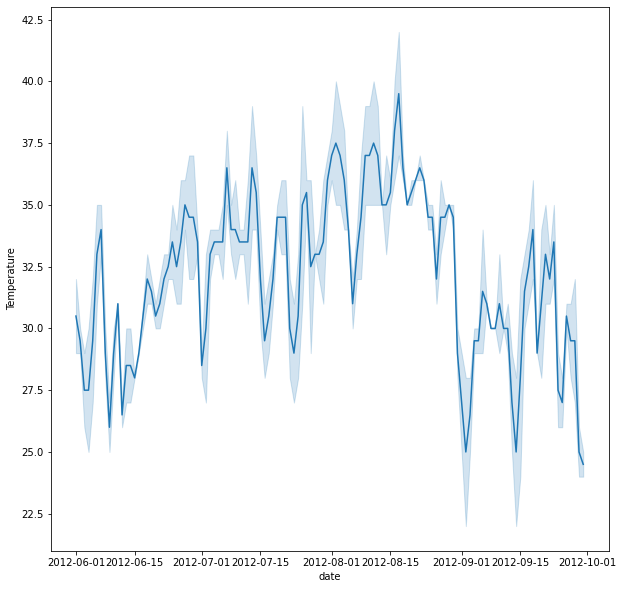

In [58]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x='date',y='Temperature')

In [ ]:
# shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in df.columns if feature not in ['Temp']]:
 sns.set(rc={'figure.figsize':(8,8)})
 sns.regplot(x=df[feature], y=df['Temp'])
 plt.xlabel(feature)
 plt.ylabel("Temp")
 plt.title("{} Vs Temp".format(feature))
 plt.show()

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

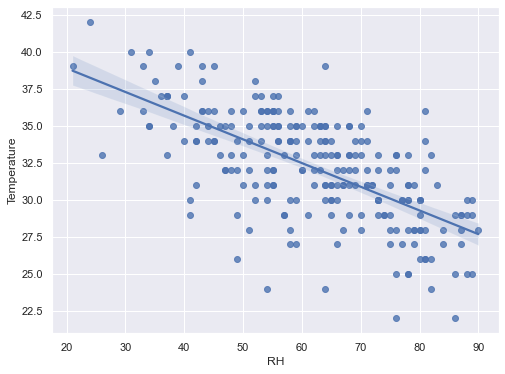

In [62]:
#check regression plot between RH and Temperature and the best fit line we can get
#from the graph where more concentration of point is there the gap is less and where less concentarion of point is there the gap is more
#this shaded area is ridge and lasso that we read earlier
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x='RH',y='Temperature',data=df)

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

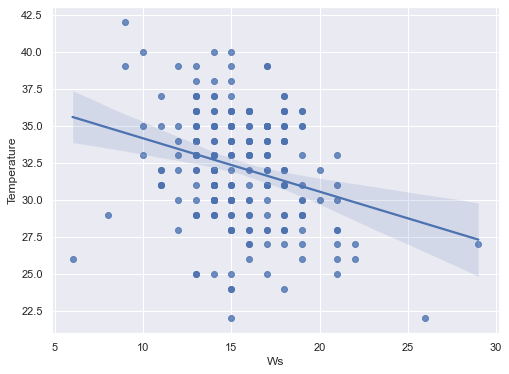

In [63]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x='Ws',y='Temperature',data=df)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

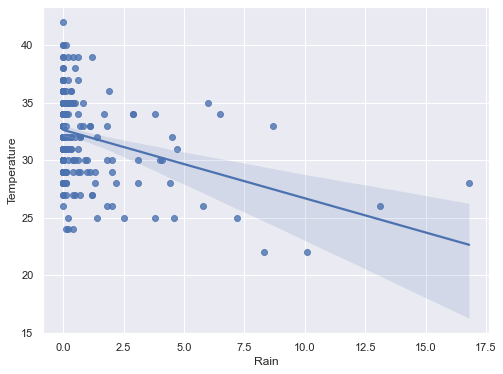

In [64]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x='Rain',y='Temperature',data=df)

# Starting Model Building Preperation

In [65]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(3), object(2)
memory usage: 22.0+ KB


In [ ]:
#before splitting the data into train and test
#need to drop unused column for better performance

In [67]:
#drop date column
df=df.drop(['date'],axis=1)

In [68]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [70]:
#change the datatypes of column
df['Classes']=df['Classes'].astype(int)
df['Region']=df['Region'].astype(int)

In [71]:
df['Classes'].dtype

dtype('int32')

In [72]:
df['Region'].dtype

dtype('int32')

In [73]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [74]:
# X independent features and y dependent feature

In [75]:
#separating Independent and Dependent Feature
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [76]:
#its a dataframe
x.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [77]:
#it's a series(dependent feature)
y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


### Splitting data into Training and Test data

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
#x=independent feature,y=dependent feature,test_size=0.33(33% of data will be going to test data)
#random_state=10(if i have taken random_state=10 and someone else has taken same 10 then the train test split will be similar for both the person)
#x_train output is y_train
#like that x_test output is y_test
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=10)

In [80]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,49,6,2.0,61.3,11.9,28.10,0.6,11.9,0.400000,0,1
78,54,18,0.0,89.4,20.0,110.90,9.7,27.5,16.100000,1,0
25,64,18,0.0,86.8,17.8,71.80,6.7,21.6,10.600000,1,0
124,80,14,2.0,48.7,2.2,7.60,0.3,2.6,0.100000,0,1
176,64,9,1.2,73.8,11.7,15.90,1.1,11.4,0.700000,0,1
72,51,13,0.3,81.3,15.6,75.10,2.5,20.7,4.200000,0,0
233,58,13,0.2,79.5,18.7,88.00,2.1,24.4,3.800000,0,1
231,33,13,0.1,90.6,25.8,77.80,9.0,28.2,15.400000,1,1
168,81,17,0.0,84.6,21.1,42.30,4.7,20.9,7.700000,1,1
188,54,14,3.1,70.5,11.0,9.10,1.3,10.5,0.800000,0,1


In [81]:
x_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
162,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1
60,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1,0
61,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0,0
63,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0,0
69,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1,0
83,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,1,0
55,53,19,0.0,89.2,17.1,98.6,10.0,23.9,15.3,1,0
211,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1
46,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,0
35,63,14,0.0,87.0,10.9,37.0,5.6,12.5,6.8,1,0


In [82]:
y_train

,Temperature
237,26
78,36
25,31
124,29
176,39
72,35
233,34
231,36
168,32
188,30


In [83]:
y_test

,Temperature
162,34
60,35
61,36
63,35
69,35
83,36
55,36
211,35
46,29
35,32


In [84]:
#size of x_train and y_train is same
x_train.shape

(163, 11)

In [85]:
x_test.shape

(81, 11)

In [86]:
y_train.shape

(163, 1)

In [87]:
y_test.shape

(81, 1)

In [ ]:
# Standardize features by removing the mean and scaling to unit variance.

# The standard score of a sample x is calculated as:

# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

# For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

# # This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.

### standardize or feature scaling the datasets

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler=StandardScaler()

In [90]:
scaler

StandardScaler()

In [91]:
#fit_transform: 1st we are fitting the data (means mu and sigma will compute) then we transform using z = (x - u) / s
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.86380439,
        -1.06992376,  0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.21724264,
         0.93464604, -1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.48821343,
         0.93464604, -1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.38217282,
         0.93464604,  0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.78427393,
        -1.06992376,  0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.797529  ,
        -1.06992376, -1.01857744]])

In [92]:
#transform: here we are transforming the data using same mu and sigma calculated for x_train data to avoid datleakage
#we are 1st splitting the data then doing fit_transform for x_train and by using same mu and sigma that is calculated for 
#x_train we are tranforming y_train to avoid data leakage. if we will 1st calculate mu and sigma then we split then there is 
#chance x_test data may leak
#for the good model accuracy x_test data should not be disclose to x_train data
#Use transform to avoid data leakage
#Test data should not be go to train data
x_test=scaler.transform(x_test)
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21344278e-01,
        -7.33442383e-01, -6.82030988e-01, -8.10784081e-01,
        -1.06992376e+00,  9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03375301e+00,
         4.94418103e-01,  1.72378441e+00,  1.16422234e+00,
         9.34646039e-01, -1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06670504e-01,
        -6.38991577e-01, -8.28897625e-01, -7.97529004e-01,
        -1.06992376e+00, -1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10863011e-01,
        -7.09829682e-01, -7.72948430e-01, -8.10784081e-01,
        -1.06992376e+00, -1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74376141e-01,
  

### Model Building

In [93]:
#Ordinary least squares Linear Regression.
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the 
# observed targets in the dataset, and the targets predicted by the linear approximation.
from sklearn.linear_model import LinearRegression

In [94]:
#multiple linear regression as multiple independent variables are there
#Create model object
regression=LinearRegression()

In [95]:
regression

LinearRegression()

In [96]:
#Train the model using training data (fitting the model)
regression.fit(x_train,y_train)

LinearRegression()

In [97]:
#Check training model accuracy and error
regression.score(x_train,y_train) #Bias is 26%

0.5764223984019132

In [98]:
#print the coefficient and the intercept

In [99]:
#coef_ means all the coefficient 
print(regression.coef_)

[[-1.2281472  -0.5309324  -0.25589654  0.9000557  -0.03689074  0.87772987
   0.26174101 -0.3848339  -0.14652686  0.15743824  0.26242813]]


In [100]:
#print intercept
#if all the independent features are 0 then the price would be 22.077 according to the model
print(regression.intercept_)

[32.17791411]


In [101]:
#prediction for the test data
#Predict the y using test data
reg_pred=regression.predict(x_test)

In [102]:
# #Check test model accuracy
regression.score(x_test,y_test) #Variance 29%

0.5276629373443694

In [103]:
reg_pred

array([[31.74374547],
       [33.29221888],
       [33.14516678],
       [31.44994127],
       [32.87563019],
       [34.72028474],
       [33.77217451],
       [34.5163387 ],
       [31.94835944],
       [32.87351351],
       [33.76269422],
       [27.62928103],
       [35.45995978],
       [29.53395864],
       [32.02944693],
       [32.15017756],
       [34.30396886],
       [28.06920065],
       [36.04114911],
       [34.3057034 ],
       [32.70629676],
       [34.54539894],
       [33.50821189],
       [33.0094757 ],
       [35.91533227],
       [29.04566881],
       [32.51522206],
       [32.6819899 ],
       [27.59059425],
       [32.24845519],
       [25.94290174],
       [27.39738366],
       [33.84067287],
       [31.95844944],
       [32.88302226],
       [30.84448083],
       [28.92136432],
       [32.84206081],
       [27.7428414 ],
       [35.3437356 ],
       [32.6653231 ],
       [34.09409339],
       [33.97749319],
       [31.64272696],
       [36.50427969],
       [33

## Assumptions of Linear regression(to check model is good or not)

Text(0, 0.5, 'Test Predicted Data')

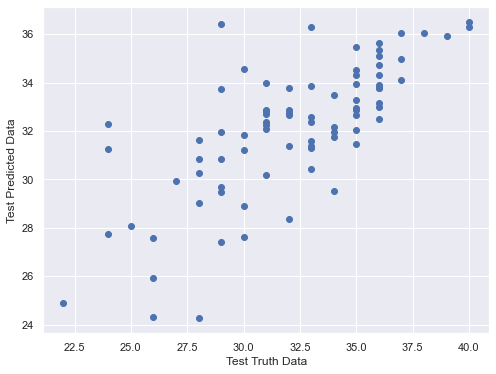

In [104]:
# assumption:1
#Truth point(real test data) and predicted point should follow linearly(x increase y increase)
#linear realtionship between test and predicted: model is good 
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [ ]:
#residuals(difference between ytest and reg_pred)

In [105]:
residuals=y_test-reg_pred

In [106]:
residuals

,Temperature
162,2.256255
60,1.707781
61,2.854833
63,3.550059
69,2.124370
83,1.279715
55,2.227825
211,0.483661
46,-2.948359
35,-0.873514


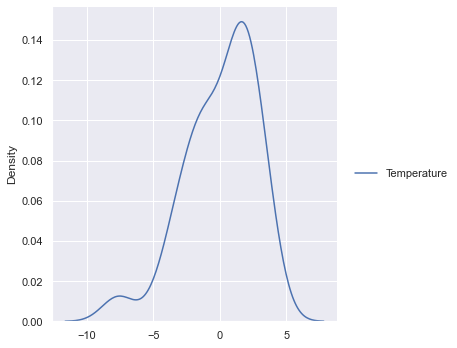

In [107]:
#assumption2: 
#when we plot the kde with residual/error it should follow approximately gaussian distribution/normal distribution
#we have almost normal distribution but still some outliers(right side) should remove from data 
sns.displot(residuals,kind='kde')

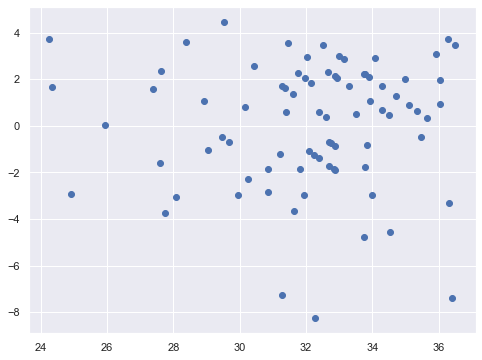

In [108]:
#assumption3: 
#scatter plot with predictions and residual should uniform distribution 
#here uniform distribution is there
plt.scatter(reg_pred,residuals)

## Performnce matrix¶

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))               #MSE(the value is high bcz we are squaring it)
print(mean_absolute_error(y_test,reg_pred))            #MAE
print(np.sqrt(mean_squared_error(y_test,reg_pred)))  #RMSE

7.142865216059495
2.186138868737038
2.672613929481678


## R square and Adjusted R square

In [112]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5276629373443694


In [113]:
#adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.45236282590651533

In [115]:
#Hence, Adjusted R square < R square

# Ridge Regression Model Prediction

In [116]:
from sklearn.linear_model import Ridge

In [117]:
#creating ridge regression model
ridge=Ridge()

In [118]:
# Passing training data(X and y) to the model
ridge.fit(x_train,y_train)

Ridge()

In [120]:
# Printing ridge co-efficients 
print(ridge.coef_)

[[-1.21986635 -0.53035677 -0.25909068  0.89298534 -0.1477117   0.76711312
   0.2549358  -0.16725298 -0.13706818  0.15551364  0.2591529 ]]


In [121]:
# Printing ridge intercept
print(ridge.intercept_)

[32.17791411]


In [123]:
#Prediction using xtest data
ridge_pred=ridge.predict(x_test)
ridge_pred

array([[31.74239454],
       [33.2968032 ],
       [33.13463127],
       [31.45472616],
       [32.87255486],
       [34.72873817],
       [33.74160934],
       [34.43476211],
       [31.94842274],
       [32.86915473],
       [33.76235408],
       [27.63930503],
       [35.43824152],
       [29.5227929 ],
       [32.02597576],
       [32.15685069],
       [34.28651759],
       [28.08895965],
       [36.0510983 ],
       [34.32747331],
       [32.70123503],
       [34.49524428],
       [33.50992468],
       [33.01471765],
       [35.90603123],
       [29.06500572],
       [32.46118425],
       [32.68684022],
       [27.60950715],
       [32.25361291],
       [25.95328757],
       [27.41385494],
       [33.82938829],
       [31.95705574],
       [32.87829099],
       [30.83406074],
       [28.9192155 ],
       [32.8280874 ],
       [27.76115672],
       [35.32628568],
       [32.65941209],
       [34.09946236],
       [33.9887632 ],
       [31.62756282],
       [36.49082959],
       [33

### Assumptions of Ridge regression

In [ ]:
# Linear relationship
# 1. Test truth data and Predicted data should follow linear relationship.
# 2. This is an indication of a good model

Text(0, 0.5, 'Predicted data')

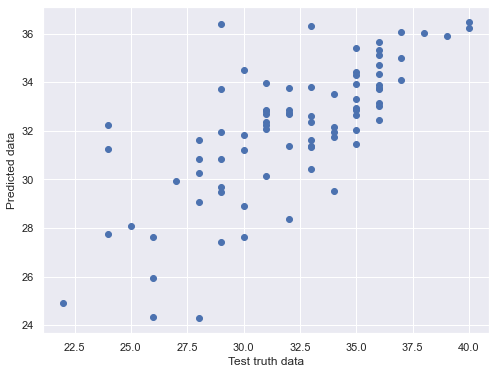

In [125]:
plt.scatter(x=y_test,y=ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [ ]:
# Residual distribution:
# 1. Residuals should follow normal distribution.
# 2. If residuals follow normal distribution, it indicates we have a good model.

In [126]:
residual_ridge=y_test-ridge_pred
residual_ridge.head()

,Temperature
162,2.257605
60,1.703197
61,2.865369
63,3.545274
69,2.127445


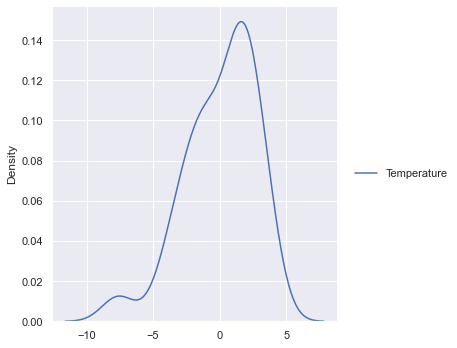

In [129]:
sns.displot(residual_ridge, kind='kde')

In [ ]:
# Uniform distribution:
# 1. Residuals vs Predictions should follow a uniform distribution.
# 2. If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

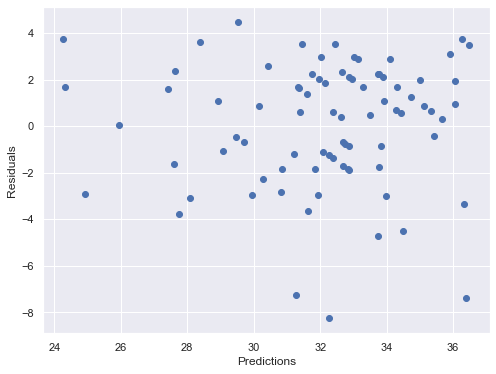

In [130]:
plt.scatter(x=ridge_pred, y=residual_ridge)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performnce matrix

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))               #MSE(the value is high bcz we are squaring it)
print(mean_absolute_error(y_test,ridge_pred))            #MAE
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))  #RMSE

7.136527756806335
2.185738321619183
2.671428036988145


### R square and Adjusted R square

In [132]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.5280820152350746


In [133]:
#adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4528487133160285

# Lasso Regression

In [134]:
from sklearn.linear_model import Lasso

In [141]:
## creating Lasso regression model
lasso=Lasso()
lasso

Lasso()

In [142]:
### Passing training data(X and y) to the model
lasso.fit(x_train, y_train)

Lasso()

In [143]:
# Printing ridge coefficient
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.          0.          0.          0.        ]


In [144]:
# Printing ridge intercept
print(lasso.intercept_)

[32.17791411]


In [145]:
#Prediction using xtest data
lasso_pred=lasso.predict(x_test)
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

## Assumptions of Lasso regression(to check model is good or not)

In [ ]:
# Linear relationship
# 1. Test truth data and Predicted data should follow linear relationship.
# 2. This is an indication of a good model

Text(0, 0.5, 'Predicted data')

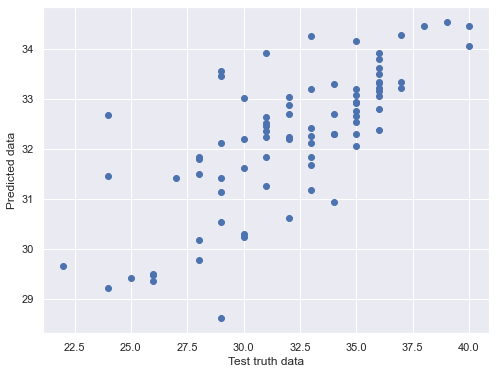

In [147]:
plt.scatter(x=y_test,y=lasso_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [148]:
# Residual distribution:
# 1. Residuals should follow normal distribution.
# 2. If residuals follow normal distribution, it indicates we have a good model.

In [153]:
lasso_pred.shape

(81,)

In [154]:
lasso_pred=lasso_pred.reshape(81,1)

In [155]:
residual_lasso = y_test-lasso_pred
residual_lasso.head()

,Temperature
162,1.702999
60,2.325597
61,2.933905
63,2.926530
69,2.075023


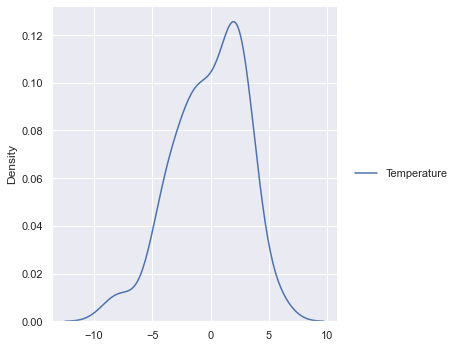

In [156]:
sns.displot(residual_lasso, kind='kde')

In [157]:
# Uniform distribution:
# 1. Residuals vs Predictions should follow a uniform distribution.
# 2. If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

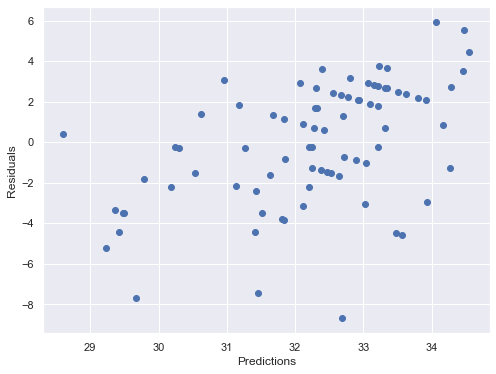

In [158]:
plt.scatter(x=lasso_pred, y=residual_lasso)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performnce matrix

In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))               #MSE(the value is high bcz we are squaring it)
print(mean_absolute_error(y_test,lasso_pred))            #MAE
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))  #RMSE

9.10609532182792
2.4978660766652734
3.0176307464346794


### R square and Adjusted R square

In [161]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.39784019626969913


In [162]:
#adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.301843705819941

# Elastic net Regression

In [163]:
from sklearn.linear_model import ElasticNet

In [164]:
# creating Elastic-Net regression model
elastic=ElasticNet()
elastic

ElasticNet()

In [165]:
# Passing training data(X and y) to the model
elastic.fit(x_train, y_train)

ElasticNet()

In [166]:
# Printing co-efficients
print(elastic.coef_)

[-0.68398958 -0.10857246 -0.0134358   0.67014444  0.07233079  0.
  0.2160955   0.03781388  0.13172382  0.10717739  0.        ]


In [167]:
# Printing intercept
print(elastic.intercept_)

[32.17791411]


In [168]:
#Prediction using xtest data
elastic_pred=elastic.predict(x_test)
elastic_pred

array([31.86480706, 32.99156685, 32.61501972, 31.68630335, 32.97062   ,
       33.98329795, 33.52754883, 32.69199663, 32.03208004, 32.73221829,
       33.40628825, 29.86415565, 34.23446288, 30.65268743, 32.75339398,
       32.28986868, 32.89142778, 29.4314202 , 35.13172569, 33.93658087,
       32.4425458 , 33.41508027, 33.54285986, 32.89645849, 35.14092212,
       29.96141854, 32.18081712, 32.46728431, 29.38059148, 32.08430645,
       29.16274758, 28.66220766, 33.27221894, 32.20415455, 32.70115205,
       31.25055749, 30.00499567, 32.36836135, 29.2048796 , 34.01904051,
       32.85108854, 33.57511016, 34.19978191, 31.6425977 , 34.55223469,
       33.426713  , 29.34896877, 33.97099639, 33.44437613, 30.28591844,
       31.50707413, 32.37886477, 34.66505251, 32.10289169, 31.43571646,
       30.85574413, 32.44430994, 34.84819667, 31.54208006, 33.48531292,
       32.17179949, 32.46122246, 31.19284421, 28.93528585, 31.79926365,
       34.86440777, 30.74919044, 30.93086354, 33.8814129 , 32.96

## Assumptions of Lasso regression(to check model is good or not)

In [170]:
# Linear relationship
# 1. Test truth data and Predicted data should follow linear relationship.
# 2. This is an indication of a good model

Text(0, 0.5, 'Predicted data')

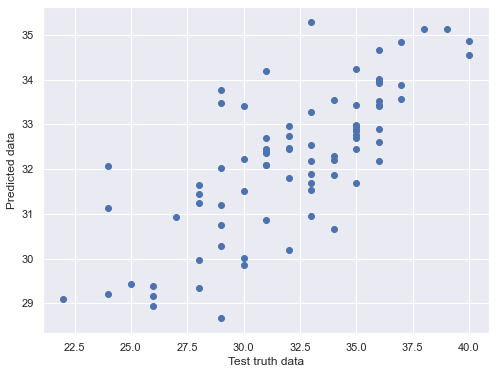

In [171]:
plt.scatter(x=y_test,y=elastic_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [172]:
# Residual distribution:
# 1. Residuals should follow normal distribution.
# 2. If residuals follow normal distribution, it indicates we have a good model.

In [174]:
elastic_pred=elastic_pred.reshape(81,1)

In [175]:
residual_elastic = y_test-elastic_pred
residual_elastic.head()

,Temperature
162,2.135193
60,2.008433
61,3.384980
63,3.313697
69,2.029380


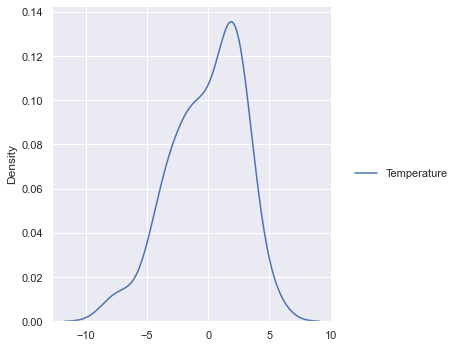

In [176]:
sns.displot(residual_elastic, kind='kde')

In [177]:
# Uniform distribution:
# 1. Residuals vs Predictions should follow a uniform distribution.
# 2. If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

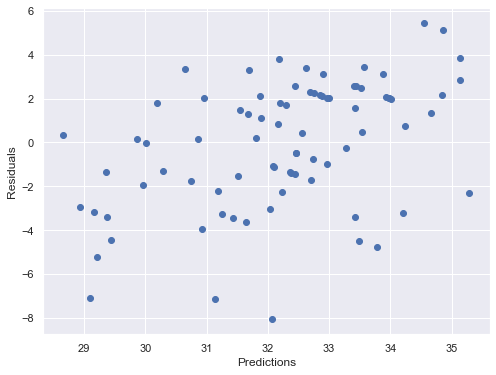

In [178]:
plt.scatter(x=elastic_pred, y=residual_elastic)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performnce matrix

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))               #MSE(the value is high bcz we are squaring it)
print(mean_absolute_error(y_test,elastic_pred))            #MAE
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))  #RMSE

8.290378147678508
2.3932384769983157
2.8793016770874336


### R square and Adjusted R square

In [181]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,elastic_pred)
print(score)

0.45178121886231637


In [182]:
#adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.36438402186935226